In [1]:
import pandas as pd
import numpy as np
import statistics 
from scipy.stats import zscore
from datetime import datetime

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 5)

#Loading the table "C2_ZJU.csv containing tabular log behavioral data on LMS of COURSE 2 at ZJU
#Note1: the course officially started on 2020-02-24
#Note2: the course officially ended on 2020-06-26
df = pd.read_csv('C2_ZJU.csv')
df 

,web-scraper-order,web-scraper-start-url,get_link,get_link-href,visit_time,time_spent,event_type,event_name,get_user_ID
0,1607264093-44289,https://courses.zju.edu.cn/course/7892/stat#/v...,NaN,https://courses.zju.edu.cn/course/7892/stat#/v...,2020.05.26 18:35,00:03:19,- -,- -,3190300543
1,1607263900-41051,https://courses.zju.edu.cn/course/7892/stat#/v...,NaN,https://courses.zju.edu.cn/course/7892/stat#/v...,2020.04.26 18:32,00:00:01,- -,- -,3190300856
...,...,...,...,...,...,...,...,...,...
22648,1607264698-56041,https://courses.zju.edu.cn/course/7892/stat#/v...,NaN,https://courses.zju.edu.cn/course/7892/stat#/v...,2020.03.02 00:51,00:00:02,作业,申请免听材料提交,3180300390
22649,1607264268-47263,https://courses.zju.edu.cn/course/7892/stat#/v...,NaN,https://courses.zju.edu.cn/course/7892/stat#/v...,2020.06.09 19:39,00:00:25,- -,- -,3190300388


In [2]:
#Total number of students: 100
nuser = df['get_user_ID'].nunique()
print(nuser)

#Getting Learner ID
user = df['get_user_ID'].unique()
print(user)

100
[3190300543 3190300856 3190300132 3190301014 3190300607 3190300962
 3190300799 3190300670 3190300348 3190301011 3190300107 3170300124
 3190300468 3190300128 3180300268 3190301001 3190300163 3190300545
 3180300432 3190300539 3190301009 3190300748 3180300390 3190300455
 3190300226 3180300568 3180300449 3190300144 3190300910 3190300331
 3180300242 3180300083 3190300865 3190300349 3190300174 3190300577
 3170300677 3180300570 3170300676 3190300593 3190300255 3190300372
 3180300116 3190300505 3190300601 3190300308 3180300540 3190300985
 3190300403 3190300388 3190301010 3190300396 3160300455 3190301013
 3190300220 3190301032 3180300651 3180300173 3170300301 3190300252
 3180300589 3190300413 3190300875 3170300287 3190300193 3190300980
 3190300961 3190300493 3190300292 3190300810 3190300271 3190300449
 3190300150 3180300056 3190300442 3190300269 3190300407 3190300290
 3190300877 3190300694 3190300514 3190300466 3180300098 3190300250
 3190300232 3190300857 3190300431 3190300719 3180300101 31

In [3]:
#There are basically three types of events (i.e. activities): video, document, quiz (i.e. excercises)
n_Etype = df['event_type'].unique()
n_Ename = df.groupby('event_type')['event_name'].unique()

#However, chronological order of events is important since it is related to one of the noncognitive abilities: self-perception 
#Getting all video events "in chronological order":
E_video = ['第二十课 什么最重要（2.25）', '第二十课 《什么最重要》课文+操练', 
            '第二十一课 《理发》生词+语法3.10', '第二十一课《理发》课文+练习 3.17',
            '第二十二课 《母亲的心》生词+语法 3.24', '第二十二课《母亲的心》课文+练习3.31',
            '第二十三课 《网络学校》生词+语法 4.7', '第二十三课 《网络学校》课文+练习4.14', 
             '第二十四课 《情商》生词+语法 4.21', '第二十四课 《情商》课文+练习4.26', 
             '第二十五课 《中秋月圆》生词+课文 4.28', '第二十五课 《中秋月圆》课文+练习 5。12',
             '第二十六课 《梁山伯与祝英台》生词+语法', '第二十六课 《梁山伯与祝英台》课文+练习 6.2', 
             '第二十六课 《梁山伯与祝英台》赏析及模拟 5.26']

#Getting all document events "in chronological order":
E_doc = ['第二十课《什么最重要》(生词+语法）', '第二十课《什么最重要》(课文+操练）', 
            '第二十一课 理发（生词+语法）', '第二十一课 《理发》（课文+操练）',
           '第二十二课 《母亲的心》（生词+语法）', '第二十二课《母亲的心》（课文+操练）',
           '第二十三课 《网络学校》生词+语法', '第二十三课 《网络学校》课文+练习', 
           '第二十四课 《情商》生词+语法', '第二十四课 《情商》课文+练习', 
           '第二十五课 《中秋月圆》生词+语法', '第二十五课 中秋月圆 课文+练习',
            '第二十六课《梁山伯与祝英台》生词+语法', '第二十六课 《梁山伯与祝英台》课文+练习']

#Getting all quiz events "in chronological order":
E_quiz = ['第20课 什么最重要 课后作业', '第二十一课 《理发》课后练习', '第二十二课课后练习',
           '第二十三课 《网络学校》', '第二十四课 《情商》测试练习', '第二十五课 《中秋月圆》练习',
           '模拟测试']

#Getting syllabus as a special type since it is related to one of the noncognitive abilities: metacognitive self-regulation
E_syll = ['汉语（乙）II课程说明']

In [4]:
#Time for feature engineering on 27 metrics of 6 noncognitive abilities!

#Creating different dictionaries for different purposes of use for feature engineering
Table_raw = {}    #Containing each learner's tabular raw data with their ID as keys
Table_1 = {}    #Containing each learner's tabular data (undergoing data cleansing) with their ID as keys
Table_1_1 = {}
Table_2 = {}    #Containing each learner's total time spent on and total visits of each events (tabular; event names as index) with their ID as keys
Table_2_1 = {}    #a subset of Table_2 for video activities only
Table_2_2 = {}    #a subset of Table_2 for document activities only
Table_2_3 = {}    #a subset of Table_2 for quiz activities only
Table_2_4 = {}    #a subset of Table_2 for syllabus activities only
Table_3 = {}    #Containing each learner's total time spent on and total visits of each visit date, and span of two close visit date (tabular; visit dates as index)s
Table_3_1 = {}    #a subset of Table_3 with visit date before mid-term
Table_3_2 = {}    #a subset of Table_3 with visit date after (including) mid-term
Table_3_3 = {}    #a subset of Table_3 with visit date before (including) course starts
Table_3_4 = {}    #a subset of Table_3 with visit date after (including) course ends
Learners = {}    #Containing each learner's profile which is a list of 27 values of the 27 metrics

#Buckle up! Before feature engineering, there are lots of data preprocessing (e.g. creating those table) to do!

for i in user:
#Creating dictionary "Table_raw" where USER_ID are keys and their corresponding raw data are values
     Table_raw[i] = df.loc[df['get_user_ID'] == i]
     Table_raw[i]['get_user_ID'] = Table_raw[i]['get_user_ID'].astype(str)
     
#Conducting data cleansing on dictionary "Table_raw" which then is named "Table_1"
     #replacing time spent less than 1s with string '00:00:01'
     Table_1[i] = Table_raw[i].replace('不足1s', '00:00:01')

     #transfering string type of time spent into time type 
     Table_1[i]['time_spent'] = pd.to_timedelta(Table_1[i].time_spent)

     #formating visit time and tranfering the string type into time type
     Table_1[i]['visit_time'] = pd.to_datetime(Table_1[i].visit_time, format='%Y.%m.%d %H:%M')

     #creating a new column that focuses on log-in "dates" only
     Table_1[i]['visit_date'] = Table_1[i]['visit_time'].dt.date

     #Sorting by visit time
     Table_1[i] = Table_1[i].sort_values('visit_time')
        
     #Converting time spent to seconds
     Table_1[i]['time_spent'] = Table_1[i]['time_spent'].dt.total_seconds()
        
     #Createing a sub-table with events != -- (-- means browsing the instuction pages which every event has)
     Table_1_1[i] = Table_1[i][Table_1[i].event_name != '- -']
    
#Creating dictionary "Table 2" whith learner ID as keys and total time spent on and total visits of each events as values
     Table_2[i] = Table_1[i].groupby(['event_name']).agg(time_sum = 
                                                         ('time_spent', 'sum'),
                                                         visits_count = 
                                                         ('event_name', 'count')).reset_index()
     Table_2[i].set_index('event_name', inplace=True)
    
    #creating a sub-table for video activities only
     Table_2_1[i] = Table_2[i].reindex(E_video)
     Table_2_1[i]['time_sum'] = Table_2_1[i]['time_sum'].fillna(0)
     Table_2_1[i]['visits_count'] = Table_2_1[i]['visits_count'].fillna(0)
    
    #creating a sub-table for document activities only
     Table_2_2[i] = Table_2[i].reindex(E_doc)
     Table_2_2[i]['time_sum'] = Table_2_2[i]['time_sum'].fillna(0)
     Table_2_2[i]['visits_count'] = Table_2_2[i]['visits_count'].fillna(0)    
    
    #creating a sub-table for quiz activities only
     Table_2_3[i] = Table_2[i].reindex(E_quiz)
     Table_2_3[i]['time_sum'] = Table_2_3[i]['time_sum'].fillna(0)
     Table_2_3[i]['visits_count'] = Table_2_3[i]['visits_count'].fillna(0)     
    
    #creating a sub-table for syllabus activities only
     Table_2_4[i] = Table_2[i].reindex(E_syll)
     Table_2_4[i]['time_sum'] = Table_2_4[i]['time_sum'].fillna(0)
     Table_2_4[i]['visits_count'] = Table_2_4[i]['visits_count'].fillna(0)
       
#Creating dictionary "Table 3" whith learner ID as keys and total time spent on and total visits of each visit date, 
#and span of two close visit dates
     Table_3[i] = Table_1[i].groupby(['visit_date']).agg(time_sum = 
                                                         ('time_spent', 'sum'),
                                                         visits_count = 
                                                         ('visit_time', 'count')).reset_index()
    #calculating day-span of two close visit dates and making NA (e.g. 1st row) 0 day
     Table_3[i]['day_difference'] = Table_3[i].diff(periods=1, axis=0)['visit_date'].fillna(pd.Timedelta(days=0))  
     Table_3[i]['day_difference'] = Table_3[i]['day_difference'].apply(lambda x: x.days)
    
    #Note: course started on 2020-02-24
    #Note: mid-term is on 2020-04-24
    #Note: course ended on 2020-06-26
    #creating a sub-table of "Table_3" with visit date before mid-term
     Table_3_1[i] = Table_3[i][(Table_3[i]['visit_date'] < datetime.strptime('2020-04-24' , '%Y-%m-%d').date())]
    #creating a sub-table of "Table_3" with visit date after (including) mid-term
     Table_3_2[i] = Table_3[i][(Table_3[i]['visit_date'] >= datetime.strptime('2020-04-24' , '%Y-%m-%d').date())]
    #creating a sub-table of "Table_3" with visit date before (including) course's starting
     Table_3_3[i] = Table_3[i][(Table_3[i]['visit_date'] <= datetime.strptime('2020-02-23' , '%Y-%m-%d').date())]
    #creating a sub-table of "Table_3" with visit date after (including) course's ending
     Table_3_4[i] = Table_3[i][(Table_3[i]['visit_date'] >= datetime.strptime('2020-06-27' , '%Y-%m-%d').date())]


#After those tables are created, it's time to conduct feature engineering!
        

#Still in the for loop        
#Creating a dictionary containing each learner's profile which is a list of 27 values of the 27 metrics
     Learners["LEARNER{0}".format(i)] = []

#Self-control
    #mean of time spent per visit for a video activity
     SC1 = np.mean(Table_2_1[i]['time_sum'] / Table_2_1[i]['visits_count'])
    #mean of time spent per visit for a doc activity
     SC2 = np.mean(Table_2_2[i]['time_sum'] / Table_2_2[i]['visits_count'])
    #time spent in total / number of visits in total
     SC3 = np.sum(Table_1_1[i]['time_spent']) / Table_1_1[i].shape[0]
    #longest time spent on one page
     SC4 = Table_1_1[i]['time_spent'].max()
    
#Engagement
    #time spent in total throughout the course
     E1 = np.sum(Table_1[i]['time_spent'])        
    #number of visits in total throughout the course
     E2 = Table_1[i].shape[0]        
    #mean of number of visits per day (if visiting)
     E3 = np.mean(Table_3[i]['visits_count'])        
    #mean of time spent per day (if visiting)
     E4 = np.mean(Table_3[i]['time_sum'])        
    #number of visit dates in total throughout the course
     E5 = Table_3[i].shape[0]        
    #reciprocal of mean of visit-day-span
     E6 = 1 / np.mean(Table_3[i]['day_difference'])
    
#Meta-cognitive Self-regulation
    #reciprocal of SD of number of visits per day (if visiting)
     MSR1 = 1 / np.std(Table_3[i]['visits_count'])
    #reciprocal of SD of time spent per day (if visiting)
     MSR2 = 1 / np.std(Table_3[i]['time_sum'])
    #reciprocal of number of unique visit-day-difference
     MSR3 = 1 / Table_3[i]['day_difference'].nunique()
    #number of activity visits in total /  number of activity
     MSR4 = Table_1_1[i].shape[0] / Table_1_1[i]['event_name'].nunique()
    #time spent on syllabus
     MSR5 = np.sum(Table_2_4[i]['time_sum'])
    #time spent on activities rather than video, document, quiz = time spent on "--" + syllabus
     MSR6 = E1 - (np.sum(Table_2_1[i]['time_sum']) + np.sum(Table_2_2[i]['time_sum']) + np.sum(Table_2_3[i]['time_sum']))

#Self-perception
    #reciprocal of difference of number of visits between early and late stages
     SP1 = 1 / abs(np.sum(Table_3_1[i]['visits_count']) - np.sum(Table_3_2[i]['visits_count']))
    #reciprocal of difference of time spent between early and late stages
     SP2 = 1 / abs(np.sum(Table_3_1[i]['time_sum']) - np.sum(Table_3_2[i]['time_sum'])) 
    #reciprocal of difference of SD of visit-day-span between early and late stages
     SP3 = 1 / abs(np.std(Table_3_1[i]['day_difference']) - np.std(Table_3_2[i]['day_difference'])) 

#Motivation 
    #time spent before (including) course starts
     M1 = np.sum(Table_3_3[i]['time_sum'])
    #time spent after (including) course ends
     M2 = np.sum(Table_3_4[i]['time_sum'])
    #number of activities participated (including grading and non-grading) 
     M3 = Table_1[i]['event_name'].nunique()
    #time spent on video, document, quiz activities
     M4 = (np.sum(Table_2_1[i]['time_sum']) + np.sum(Table_2_2[i]['time_sum']) + np.sum(Table_2_3[i]['time_sum']))

    #Appending values above to the learner's profile list
     Learners["LEARNER{0}".format(i)].append(
         list(Table_raw[i]['get_user_ID'].unique()) + 
         list(Table_2_1[i]['time_sum']) + list(Table_2_2[i]['time_sum']) + 
         [SC1, SC2, SC3, SC4, 
         E1, E2, E3, E4, E5, E6, 
         MSR1, MSR2, MSR3, MSR4, MSR5, MSR6, 
         SP1, SP2, SP3, 
         M1, M2, M3, M4])    


C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in longlong_scalars


In [5]:
#Pairing Learner ID (key) and corresponding profile list (value) as a tuple 
Learners.items()

#Jamming dictionary into a data frame
Learners_col = ['user_ID'] + E_video + E_doc + [
    'SC1', 'SC2', 'SC3', 'SC4', 
    'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 
    'MSR1', 'MSR2', 'MSR3', 'MSR4', 'MSR5', 'MSR6', 
    'SP1', 'SP2', 'SP3', 
    'M1', 'M2', 'M3', 'M4']

df_Learners = pd.DataFrame(columns = Learners_col)
for i in user:
    a_series = pd.Series(Learners['LEARNER' + str(i)][0], index = df_Learners.columns) # why index = df_Learners.columns?
    df_Learners = df_Learners.append(a_series, ignore_index=True)


df_Learners.set_index('user_ID', inplace=True)
df_Learners = df_Learners.astype(np.float64)    #Since some data are objects (e.g. time), they need to be transformed into float
                                                #Otherwise, they cannot be min-max normalized later
#Dealing with na (i.e. no any participating records, even 1 second)
df_Learners = df_Learners.fillna(0)
#Dealing with positive and negative inf
for i in df_Learners.columns:
    mask = df_Learners[str(i)] != np.inf
    df_Learners.loc[~mask, str(i)] = df_Learners.loc[mask, str(i)].max()
    mask = df_Learners[str(i)] != -np.inf
    df_Learners.loc[~mask, str(i)] = df_Learners.loc[mask, str(i)].min()
    
#attrition = both SC1 and SC2 are 0, which means they did not participate any video & document event 
#since they had exemptions, and only needed to take quizzes
attr_cols = ['SC1','SC2']
df_Learners_attr = df_Learners[df_Learners[attr_cols].isin([0]).all(axis=1)]    #axis 1 = both columns
df_Learners_2 = df_Learners.drop(df_Learners_attr.index, axis = 0)    #axis 0 = dropping rows (just returning a copy, not modifying the original table)

df_Learners_2.describe()

,第二十课 什么最重要（2.25）,第二十课 《什么最重要》课文+操练,第二十一课 《理发》生词+语法3.10,第二十一课《理发》课文+练习 3.17,第二十二课 《母亲的心》生词+语法 3.24,第二十二课《母亲的心》课文+练习3.31,第二十三课 《网络学校》生词+语法 4.7,第二十三课 《网络学校》课文+练习4.14,第二十四课 《情商》生词+语法 4.21,第二十四课 《情商》课文+练习4.26,第二十五课 《中秋月圆》生词+课文 4.28,第二十五课 《中秋月圆》课文+练习 5。12,第二十六课 《梁山伯与祝英台》生词+语法,第二十六课 《梁山伯与祝英台》课文+练习 6.2,第二十六课 《梁山伯与祝英台》赏析及模拟 5.26,第二十课《什么最重要》(生词+语法）,第二十课《什么最重要》(课文+操练）,第二十一课 理发（生词+语法）,第二十一课 《理发》（课文+操练）,第二十二课 《母亲的心》（生词+语法）,第二十二课《母亲的心》（课文+操练）,第二十三课 《网络学校》生词+语法,第二十三课 《网络学校》课文+练习,第二十四课 《情商》生词+语法,第二十四课 《情商》课文+练习,...,第二十六课《梁山伯与祝英台》生词+语法,第二十六课 《梁山伯与祝英台》课文+练习,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4
count,53.00000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,496.54717,595.792453,496.132075,319.528302,628.679245,283.641509,255.811321,292.132075,5.584906,1305.943396,92.509434,1163.943396,2.09434,184.075472,186.566038,114.320755,80.698113,223.150943,14.45283,300.018868,24.584906,250.641509,8.924528,33.886792,24.075472,...,46.698113,20.566038,466.037851,81.557178,218.948372,6089.188679,24768.660377,316.188679,10.434740,802.406863,29.433962,0.232174,0.100018,0.001302,0.107611,4.474165,112.754717,14702.037736,0.081231,0.000511,13.676212,428.301887,53.603774,16.943396,10066.622642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,29.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,113.000000,20.000000,0.000000,0.00000,61.000000,0.000000,0.000000,0.000000,4.000000,3.000000,...,1.000000,6.000000,63.200000,90.631944,230.307692,6592.000000,24512.000000,439.000000,11.675000,795.757576,36.000000,0.278689,0.122592,0.001094,0.111111,5.055556,109.000000,14402.000000,0.033333,0.000217,0.812024,475.000000,76.000000,20.000000,7419.000000
max,9286.00000,17660.000000,10851.000000,9790.000000,25741.000000,6544.000000,6600.000000,9775.000000,229.000000,28353.000000,4902.000000,41584.000000,102.00000,7491.000000,9446.000000,1542.000000,2791.000000,9996.000000,376.00000,12238.000000,312.000000,10784.000000,260.000000,392.000000,442.000000,...,721.000000,348.000000,12364.241071,771.285714,1176.371429,41584.000000,182328.000000,975.000000,17.344828,5409.333333,69.000000,0.687500,0.244090,0.027754,0.250000,10.923077,806.000000,115745.000000,1.000000,0.010638,673.210978,3954.000000,459.000000,40.000000,100592.000000


In [6]:
print(df_Learners_2.isnull().sum().sum())
print(np.isinf(df_Learners_2).sum().sum())

0
0


In [7]:
#There is one cognitive ability: grit not being engineered yet
#Let's do it now!

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()    # Scaling to 0~1
df_Learners_3 = df_Learners_2[:]
df_Learners_3 = scaler.fit_transform(df_Learners_3)    #axis = 0; scaleing on each column
# Now df_Learners is a 100 x 52 matrix; each array represents a learner

# Making arrays "rows of data frame"
df_Learners_3 = pd.DataFrame(df_Learners_3, index = df_Learners_2.index, 
                                          columns = df_Learners_2.columns)

#Grit
#mean of min-max normalized of time spent on video activities
df_Learners_3['G1'] = np.mean(df_Learners_3.loc[:, E_video], axis = 1)    #axis = 1
#mean of min-max normalized of time spent on document activities
df_Learners_3['G2'] = np.mean(df_Learners_3.loc[:, E_doc], axis = 1)
#reciprocal of SD of min-max normalized of time spent on video activities
df_Learners_3['G3'] = 1 / np.std(df_Learners_3.loc[:, E_video], axis = 1)
#reciprocal of SD of min-max normalized of time spent on document activities
df_Learners_3['G4'] = 1 / np.std(df_Learners_3.loc[:, E_video], axis = 1)

#Dropping columns of time spent on each video and document activity after finishing feature engineering on grit
df_Learners_3 = df_Learners_3.drop(E_video + E_doc, axis =1)    #just returning a copy, not modifying the original table
df_Learners_3.describe()

C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.0
mean,0.037692,0.105742,0.171807,0.145239,0.133961,0.282341,0.431877,0.142617,0.317827,0.257142,0.278146,0.042296,0.177306,0.293121,0.139894,0.124100,0.077902,0.046953,0.020315,0.108321,0.116784,0.321865,0.099975,0.032277,0.051557,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,0.005112,0.117508,0.181633,0.157347,0.132550,0.416122,0.533847,0.141380,0.431034,0.333030,0.391251,0.034793,0.197531,0.356848,0.135236,0.121499,0.029831,0.019225,0.001206,0.120132,0.165577,0.411765,0.073652,0.002670,0.102226,NaN,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.593129,0.346854,inf,inf


In [8]:
print(np.isinf(df_Learners_3).sum().sum())    #There are positive and negative inf in grit columns

#Dealing with positive and negative inf values
for i in df_Learners_3.columns[-4:]:    #object
    mask = df_Learners_3[str(i)] != np.inf
    df_Learners_3.loc[~mask, str(i)] = df_Learners_3.loc[mask, str(i)].max()
    mask = df_Learners_3[str(i)] != -np.inf
    df_Learners_3.loc[~mask, str(i)] = df_Learners_3.loc[mask, str(i)].min()

print(np.isinf(df_Learners_3).sum().sum()) 

28
0


In [9]:
#Scaling grit metrics to 0~1
scaler_grit = MinMaxScaler()
df_Learners_3[['G1','G2', 'G3', 'G4']] = scaler_grit.fit_transform(df_Learners_3[['G1','G2', 'G3', 'G4']])    #axis = 0 

df_Learners_3.describe()
#Finishing all 27 metrics of the 6 noncognitive abilities!

,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.037692,0.105742,0.171807,0.145239,0.133961,0.282341,0.431877,0.142617,0.317827,0.257142,0.278146,0.042296,0.177306,0.293121,0.139894,0.124100,0.077902,0.046953,0.020315,0.108321,0.116784,0.321865,0.099975,0.054418,0.148641,0.339187,0.339187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,0.005112,0.117508,0.181633,0.157347,0.132550,0.416122,0.533847,0.141380,0.431034,0.333030,0.391251,0.034793,0.197531,0.356848,0.135236,0.121499,0.029831,0.019225,0.001206,0.120132,0.165577,0.411765,0.073652,0.004501,0.294725,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Copy df_Learners_2 (just in case)
df_Learners_4 = df_Learners_3[:]    # still a dataframe

In [11]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
e = df_Learners_4.corr()
sns.heatmap(e, cmap="YlGnBu")

In [12]:
from __future__ import print_function
import sys
import numpy
numpy.set_printoptions(linewidth=1000)
from sklearn.decomposition import PCA

#Coducting PCA (where I set 5 principal components initially).
n=5
pca = PCA(n_components=n, random_state= 88)
pct = pca.fit_transform(df_Learners_4)

#Appending the 5 principle components (PCs) to the df_Learners_4 data frame
for i in range(n):
    df_Learners_4['PC' + str(i + 1)] = pct[:, i]

display(df_Learners_4.head())

C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4,PC1,PC2,PC3,PC4,PC5
user_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3190300856,0.002986,0.114455,0.110980,0.134518,0.107458,0.245098,0.321874,0.113034,0.344828,0.267401,0.391251,0.019765,0.080808,0.162852,0.011166,0.105254,0.009582,0.013669,0.000516,0.120132,0.000000,0.676471,0.073652,0.011009,0.289190,0.001517,0.001517,0.477597,-0.194698,0.084174,-0.031998,-0.175696
3190300132,0.000121,0.048155,0.065430,0.111954,0.138190,0.752723,0.598935,0.072497,0.844828,0.700952,0.129129,0.026644,0.380952,0.629356,0.000000,0.114521,0.014962,0.046715,0.001296,0.000000,0.082789,0.558824,0.118611,0.000092,0.306267,0.199312,0.199312,0.429510,0.179859,-0.745460,0.277040,-0.347492
3190301014,0.129375,0.160338,0.373142,0.189472,0.227114,0.222222,0.368729,0.280826,0.275862,0.239421,0.322496,0.009074,0.133333,0.153457,0.074442,0.121499,0.017730,0.008751,0.001174,0.000000,0.000000,0.588235,0.271453,0.200775,0.402557,0.000028,0.000028,0.605344,0.085146,0.237744,-0.070064,0.027376
3190300607,0.156781,0.096150,0.560609,0.179863,0.800606,0.253813,0.457035,1.000000,0.275862,0.248523,0.162173,0.000000,0.197531,0.252389,0.877171,0.390728,0.021467,0.000852,0.000622,0.000000,0.000000,1.000000,1.000000,1.000000,0.414613,0.000002,0.000002,1.183557,1.236942,0.524690,-0.728868,0.400436
3190300962,0.000000,0.010372,0.031035,0.011318,0.058401,0.485839,1.000000,0.064017,0.310345,0.289772,0.066219,0.048157,0.133333,0.370688,0.000000,0.070978,0.007913,0.017982,0.001750,0.000000,0.000000,0.176471,0.024229,0.000000,0.009162,1.000000,1.000000,-0.896188,0.298997,-0.596279,-0.095349,0.011634


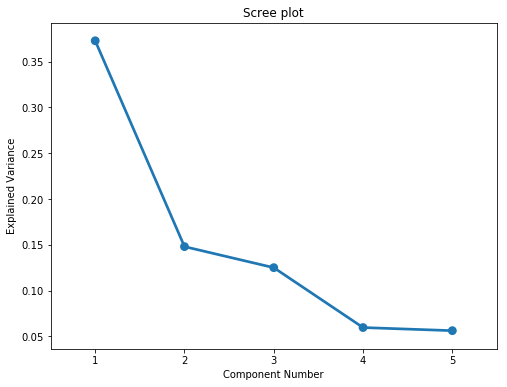

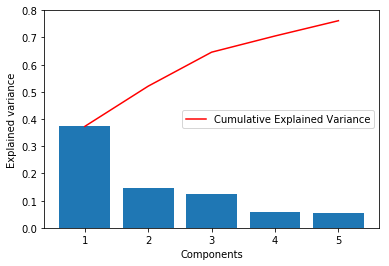

In [13]:
#Ploting a scree plot (for the purpose of deciding the number of PC)
ind = np.arange(1,n+1)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

#Checking for eigenvalues (i.e. variance on each PC) and loadings on each PC
check_eigenValues_pca = pca.explained_variance_ratio_

plt.bar(range(1, len(check_eigenValues_pca)+1), check_eigenValues_pca)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(check_eigenValues_pca)+1),
         np.cumsum(check_eigenValues_pca),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='center right')

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
SC1,0.077770,0.161242,0.068589,0.190991,0.220190
SC2,0.052265,0.088352,0.195539,0.016378,-0.197838
...,...,...,...,...,...
G3,-0.604895,0.348721,-0.024678,0.028693,-0.076082
G4,-0.604895,0.348721,-0.024678,0.028693,-0.076082


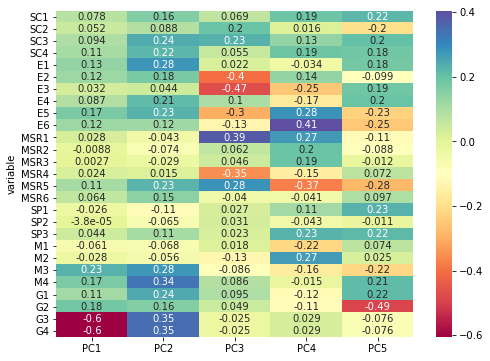

In [14]:
#Checking loadings on each PC
check_loadings_pca = pca.components_    #matrix of 5 X 27

#Creating a data frame and corresponding heatmap indicating 27 metrics' loadings on each PC
num_pc = 5
check_pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
check_loadings_df = pd.DataFrame.from_dict(dict(zip(check_pc_list, check_loadings_pca)))
check_loadings_df['variable'] = df_Learners_3.columns.values
check_loadings_df = check_loadings_df.set_index('variable')
display(check_loadings_df)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(check_loadings_df, annot=True, cmap='Spectral')
plt.show()

C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


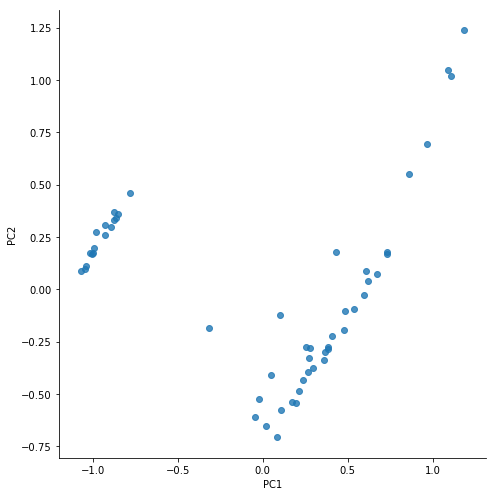

In [15]:
#As a result, the number of PCs is decided to be 2 (60% variance explained)
#Projecting data onto the 2-D plane consisting of the 2 PCs
g = sns.lmplot('PC1',
               'PC2',
               data=df_Learners_4,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

In [16]:
#Since selecting the first 2 PCs, droping the other 3 PCs (i.e. PC3, PC4 & PC5) out of the data frame
df_Learners_4 = df_Learners_4.drop(columns =['PC3', 'PC4', 'PC5']) 

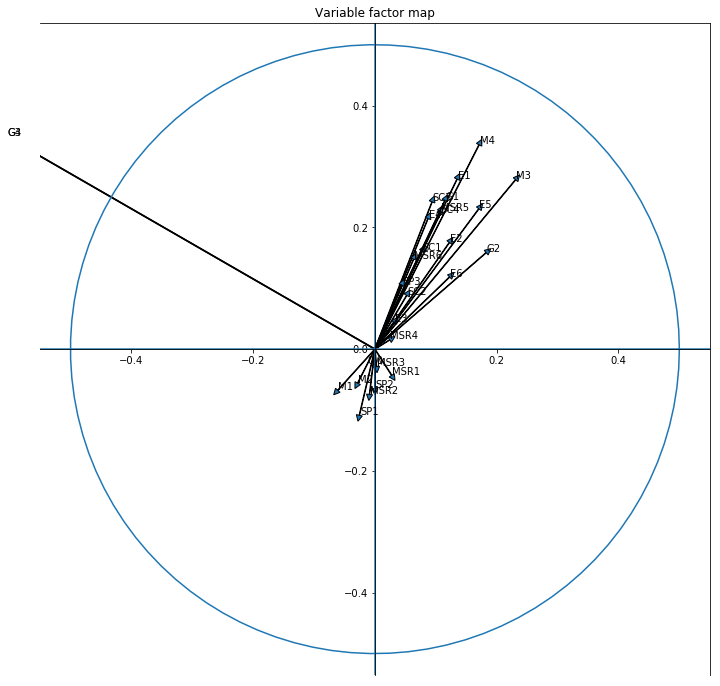

In [17]:
#Ploting a variable factor map in the plane (i.e. vectors of 27 metrics in the plane consisting of the 2 PCs)
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(df_Learners_3.columns)):    #number of features
    ax.arrow(0,
             0,    #starting the arrow at the origin of the plane
             pca.components_[0, i],    #0 for PC1, i for corresponding metrics' loading on PC1
             pca.components_[1, i],    #1 for PC2, i for corresponding metrics' loading on PC2
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] + 0.001,
             pca.components_[1, i] + 0.001,
             df_Learners_3.columns[i])                   


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(0.5 * np.cos(an), 0.5 * np.sin(an))  #adding a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  #making the unit circle in the center of the plot
ax.spines['bottom'].set_position('zero')  #making the unit circle in the center of the plot

plt.axvline(0)  #drawing a vertical line on the origin
plt.axhline(0)  #drawing a horizontal line on the origin
plt.show()


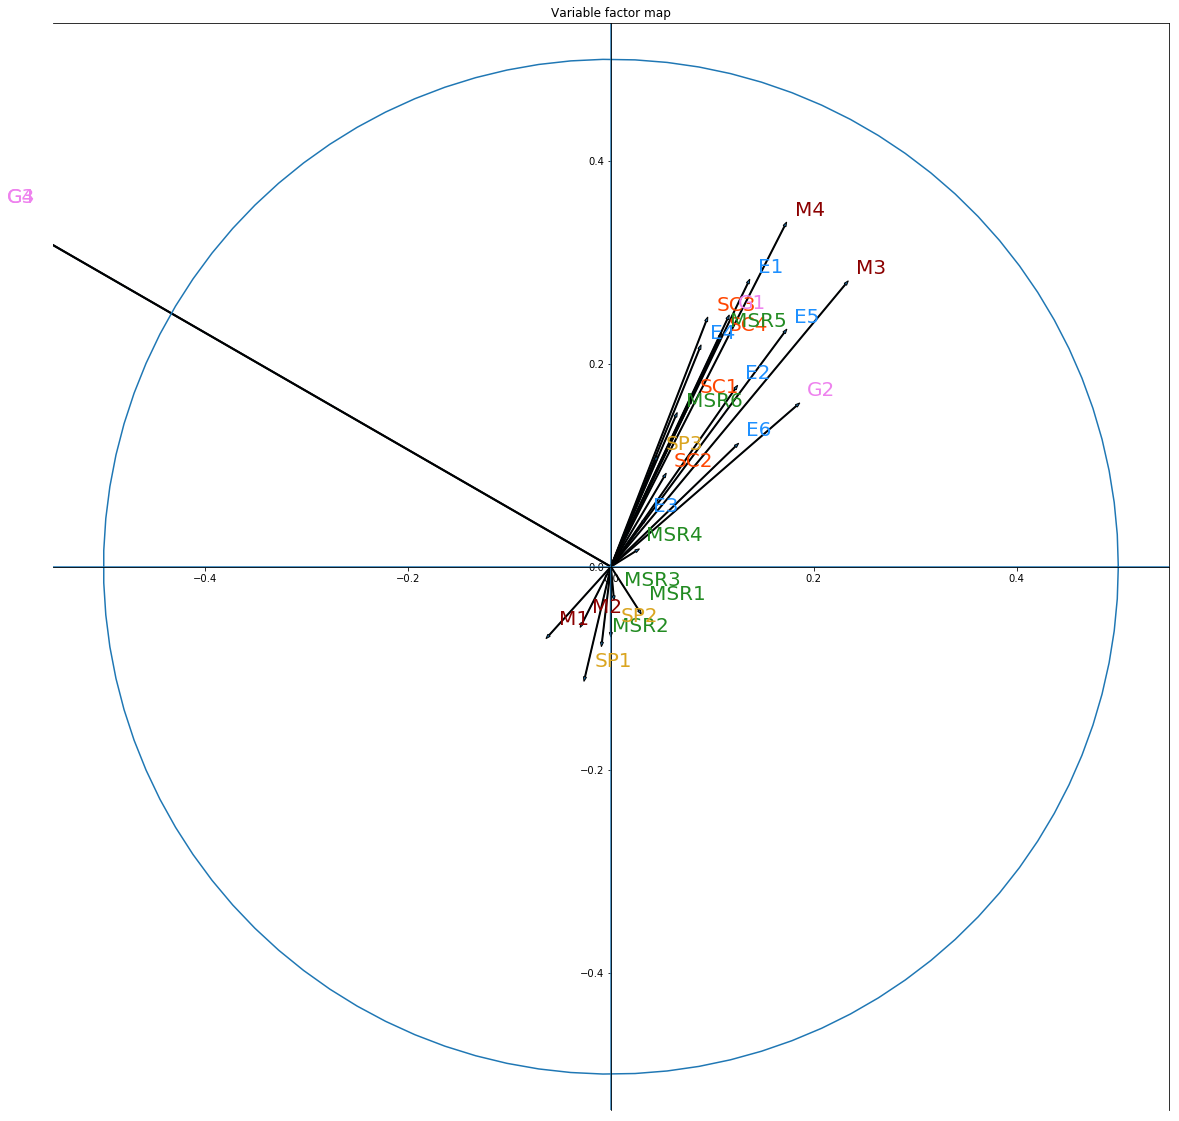

In [18]:
#Zoom in!
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

(fig, ax) = plt.subplots(figsize=(20, 20))
for i in range(0, len(df_Learners_3.columns)): 
    ax.arrow(0,
             0,  
             pca.components_[0, i],  
             pca.components_[1, i],  
             )
    if i < 4:    #Self-control (4 metrics)
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Learners_3.columns[i], fontsize=20, color='orangered')
    elif i < 10:    #Engagement (6 metrics)
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Learners_3.columns[i], fontsize=20, color='dodgerblue')            
    elif i < 16:    #Metacognitive Self-regulation (6 metrics)
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Learners_3.columns[i], fontsize=20, color='forestgreen')        
    elif i < 19:    #Self-perception (3 metrics)
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Learners_3.columns[i], fontsize=20, color='goldenrod')        
    elif i < 23:    #Motivation (4 metrics)
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Learners_3.columns[i], fontsize=20, color='darkred')        
    else:     #Grit (4 metrics)
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Learners_3.columns[i], fontsize=20, color='violet')        

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(0.5 * np.cos(an), 0.5 * np.sin(an)) 
plt.axis('equal')

ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  
ax.spines['bottom'].set_position('zero')  

plt.axvline(0)  
plt.axhline(0)  
plt.show()

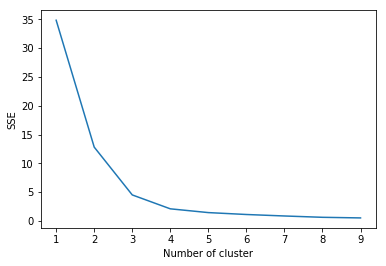

In [19]:
#Creating a table containing the 2 PCs
df_Learners_4_2PC = df_Learners_4.iloc[:, -2:]

#Now conducting k-means clustering! 
#First creating a screet plot to decide the hyperparameter "k" (via elbow method)
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_Learners_4_2PC)    #it's "df_Learners_4_2PC" instead of df_Learners_3!
    sse[k] = kmeans.inertia_    #inertia: sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

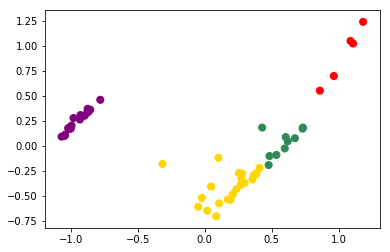

In [20]:
#After deciding k to be 4, visualizing the k-meas clusting result in the plane consisting of the 2 PCs

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_Learners_4_2PC)
y_kmeans = kmeans.predict(df_Learners_4_2PC)
df_Learners_4['cluster'] = y_kmeans.astype('float32')
colors = {0:'purple', 1:'seagreen', 2:'gold', 3:'red'}    #predicted to be 0 = purple; 1 = seagreen; 2 = gold; 3 = red
PSGR=df_Learners_4['cluster'].apply(lambda x: colors[x])    #matching predicted labes with colors

x = df_Learners_4['PC1'].astype('float32')
y = df_Learners_4['PC2'].astype('float32')

plt.scatter(x, y, c=PSGR, s=50, cmap='viridis')


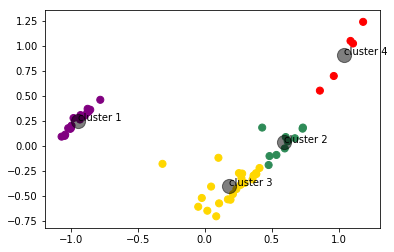

In [21]:
#Centers of the three clusters
centers = kmeans.cluster_centers_    #0 = cluster 1 (i.e. first array); 1 = cluster 2 (i.e. second array); vice versa
#matrix of 4 X 2

plt.scatter(x, y, c=PSGR, s=50, cmap='viridis')

#Marking centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
n = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']    #matching predicted labes with cluster names
for i, txt in enumerate(n):
    plt.annotate(txt, (centers[i, 0], centers[i, 1]), color='black')

plt.show()

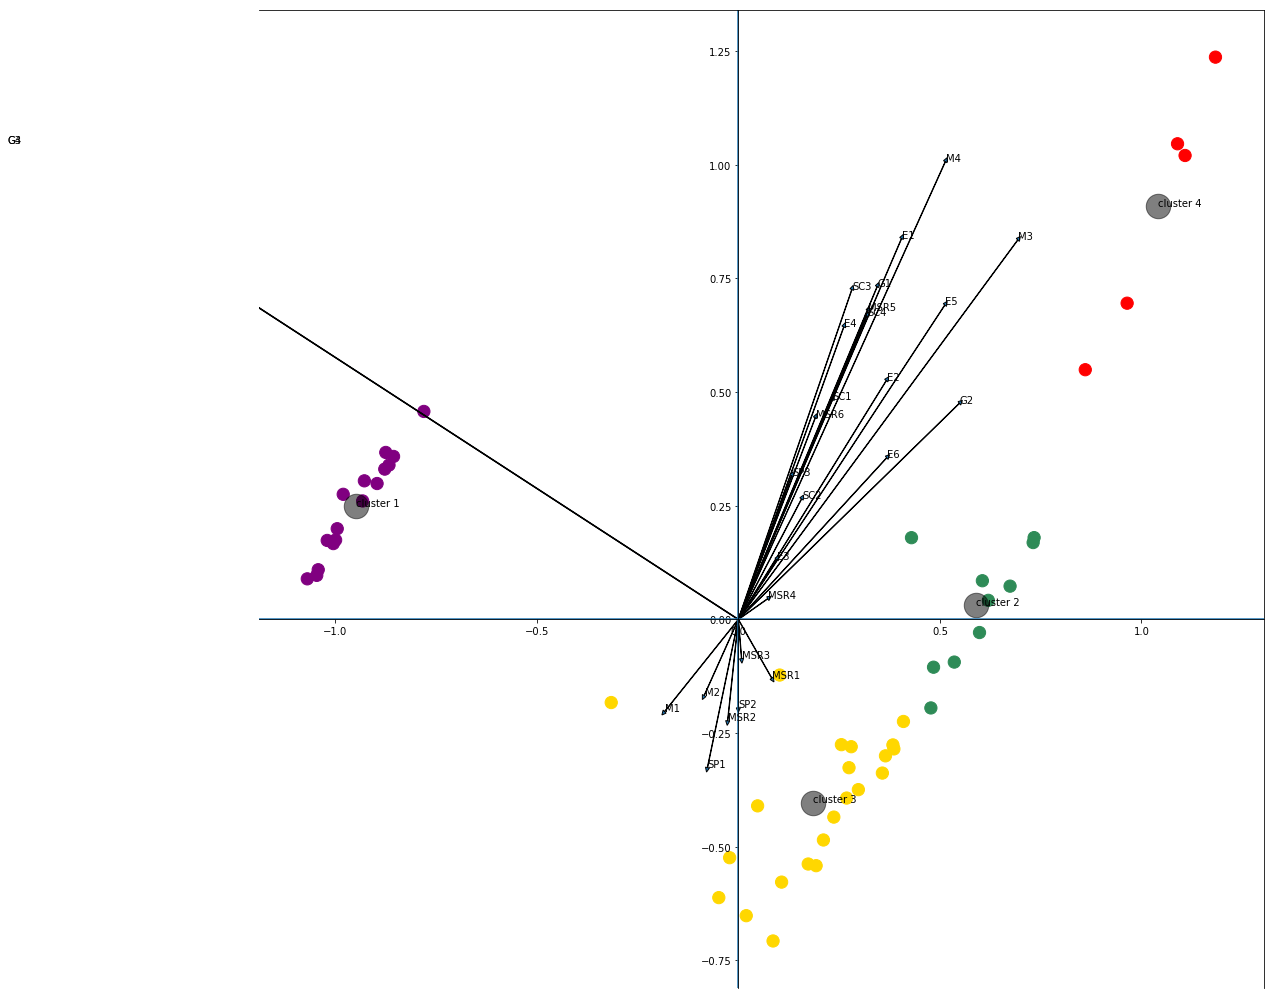

In [22]:
#Now putting the k-means clustering results and centers, the vector map in the same plane consisting of 2 PCs together!

#the vector map
(fig, ax) = plt.subplots(figsize=(18, 18))
for i in range(0, len(df_Learners_3.columns)): 
    ax.arrow(0,
             0,  
             pca.components_[0, i] * 3,  
             pca.components_[1, i] * 3,  
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] * 3 + 0.001,
             pca.components_[1, i] * 3 + 0.001,
             df_Learners_3.columns[i])                   

ax.spines['left'].set_position('zero')  
ax.spines['bottom'].set_position('zero')  

plt.axvline(0)  
plt.axhline(0)  

#the k-means clustering results
plt.scatter(x, y, c=PSGR, s=150, cmap='viridis')

#the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=600, alpha=0.5)
n = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
for i, txt in enumerate(n):
    plt.annotate(txt, (centers[i, 0], centers[i, 1]), color='black')

plt.show()

In [23]:
#Finally, I am going to plot learner personas according to the results above!

#Creating a data frame containing each learner's average score on each noncognitive ability 
df_Learners_4_New = df_Learners_4.copy(deep=True)    #modifications to the data or indices of the copy will not be reflected in the original object

df_Learners_4_New['Self_control'] = df_Learners_4_New.iloc[:, :4].mean(axis=1)    #mean of the learner's 4 metrics of SC
df_Learners_4_New['Engagement'] = df_Learners_4_New.iloc[:, 4:10].mean(axis=1)    #mean of the learner's 6 metrics of E
df_Learners_4_New['Metacognition'] = df_Learners_4_New.iloc[:, 10:16].mean(axis=1)    #mean of the learner's 6 metrics of MSR
df_Learners_4_New['Self_perception'] = df_Learners_4_New.iloc[:, 16:19].mean(axis=1)    #mean of the learner's 3 metrics of SP
df_Learners_4_New['Motivation'] = df_Learners_4_New.iloc[:, 19:23].mean(axis=1)    #mean of the learner's 4 metrics of M
df_Learners_4_New['Grit'] = df_Learners_4_New.iloc[:, 23:27].mean(axis=1)    #mean of the learner's 4 metrics of G

df_Learners_4_New = df_Learners_4_New.drop(list(df_Learners_4_New)[:27], axis=1)
df_Learners_4_New

,PC1,PC2,cluster,Self_control,Engagement,Metacognition,Self_perception,Motivation,Grit
user_ID,,,,,,,,,
3190300856,0.477597,-0.194698,1.0,0.090735,0.233282,0.128516,0.007922,0.217564,0.075808
3190300132,0.429510,0.179859,1.0,0.056415,0.518021,0.213434,0.020991,0.190056,0.176246
...,...,...,...,...,...,...,...,...,...
3190300576,0.211013,-0.485168,2.0,0.065867,0.138457,0.245458,0.021530,0.040869,0.003707
3190300106,-0.927687,0.304906,0.0,0.190944,0.152182,0.211087,0.112221,0.052397,0.500067


C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


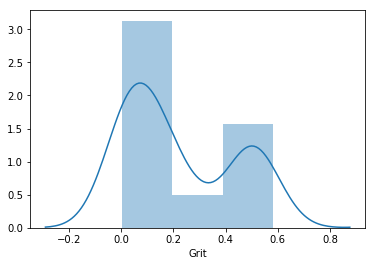

In [24]:
#Before constructing the 4 personas (4 clusters), lets' do exploratory data analysis on all learners

#Grit
sns.distplot(df_Learners_4_New['Grit'])

C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


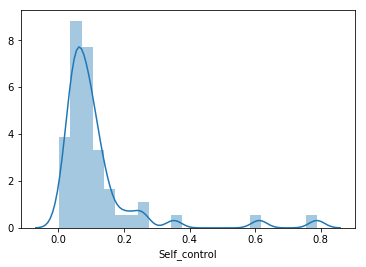

In [25]:
#Self-control
sns.distplot(df_Learners_4_New['Self_control'])

C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


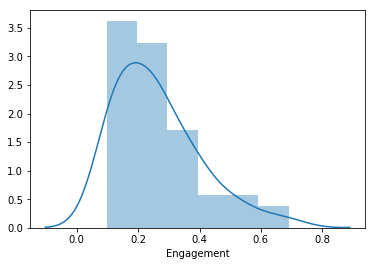

In [26]:
#Engagement
sns.distplot(df_Learners_4_New['Engagement'])

C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


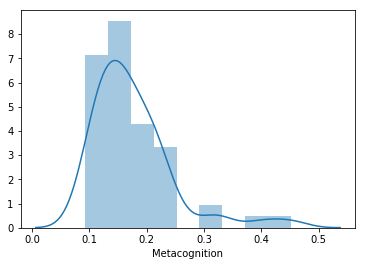

In [27]:
#Metacognitive Self-regulation
sns.distplot(df_Learners_4_New['Metacognition'])

C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


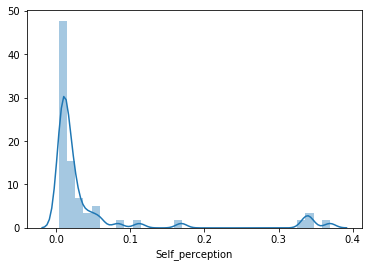

In [28]:
#Self-perception
sns.distplot(df_Learners_4_New['Self_perception'])

C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


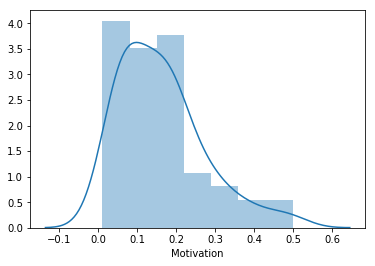

In [29]:
#Motivation
sns.distplot(df_Learners_4_New['Motivation'])

In [30]:
#All right! Let's start building the 4 personas!

#Retrieving each cluster's learner data
cluster_1 = df_Learners_4_New.loc[df_Learners_4_New['cluster'] == 0]    #Cluster 1
cluster_2 = df_Learners_4_New.loc[df_Learners_4_New['cluster'] == 1]    #Cluster 2
cluster_3 = df_Learners_4_New.loc[df_Learners_4_New['cluster'] == 2]    #Cluster 3
cluster_4 = df_Learners_4_New.loc[df_Learners_4_New['cluster'] == 3]    #Cluster 4

#number of learners in each cluster
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)
print(cluster_4.shape)

(16, 9)
(10, 9)
(22, 9)
(5, 9)


In [31]:
clusters = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']

#Creating 4 series of the same cluster learners' mean of each of the 6 noncognitive abilities, PC values, and cluster label
mean_cluster = {}
for i, c in enumerate(clusters):
   mean_cluster[i] = (eval(c).mean(axis=0))   #4 series

#Making the 4 series 4 lists
mean_cluster_list = {}
for i in range(4):
    mean_cluster_list[i] = eval('mean_cluster[{0}]'.format(i)).tolist()    #4 lists

In [32]:
#Stacking lists forming a data frame
df_cluster = pd.DataFrame(columns = df_Learners_4_New.columns)
for i in range(4):
    df_cluster = df_cluster.append(mean_cluster[i], ignore_index=True)

df_cluster

,PC1,PC2,cluster,Self_control,Engagement,Metacognition,Self_perception,Motivation,Grit
0,-0.947844,0.250254,0.0,0.080661,0.195917,0.149160,0.024576,0.113546,0.507561
1,0.588967,0.030693,1.0,0.095235,0.371827,0.185483,0.015729,0.214591,0.133893
2,0.184985,-0.402724,2.0,0.072716,0.208901,0.165892,0.073433,0.126988,0.053933
3,1.041233,0.909788,3.0,0.451733,0.476429,0.285390,0.079729,0.363128,0.206510


C:\Users\lawre\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


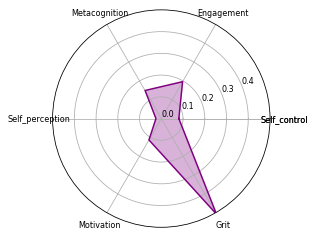

In [33]:
#Visualizing the four personas!
from math import pi

categories = df_cluster.columns[-6:].get_values().tolist()    ##should be a list to be appended
N = len(categories)

angles0 = [n / float(N)*2*pi for n in range(N)]

slicing_cluster_1 = mean_cluster_list[0][-6:]
slicing_cluster_1 += [mean_cluster_list[0][-6]]    #should be a list to be appended
angles0 += angles0[:1]
categories += categories[:1]

plt.polar(angles0, slicing_cluster_1, 'purple')
#color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, slicing_cluster_1, 'purple', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.5)
axes.set_yticks(np.arange(0,0.5,0.1))

plt.show()

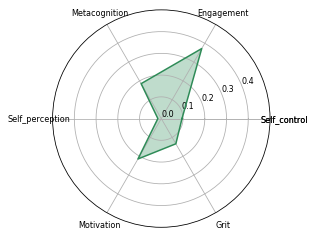

In [34]:
slicing_cluster_2 = mean_cluster_list[1][-6:]
slicing_cluster_2 += [mean_cluster_list[1][-6]]    #should be a list to be appended

plt.polar(angles0, slicing_cluster_2, 'seagreen')
#color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, slicing_cluster_2, 'seagreen', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.5)
axes.set_yticks(np.arange(0,0.5,0.1))

plt.show()

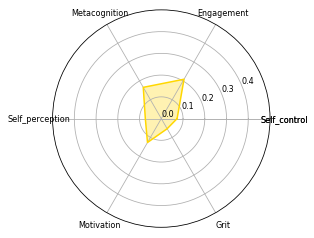

In [35]:
slicing_cluster_3 = mean_cluster_list[2][-6:]
slicing_cluster_3 += [mean_cluster_list[2][-6]]    #should be a list to be appended

plt.polar(angles0, slicing_cluster_3, 'gold')
#color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, slicing_cluster_3, 'gold', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.5)
axes.set_yticks(np.arange(0,0.5,0.1))

plt.show()

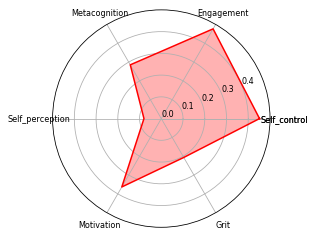

In [36]:
slicing_cluster_4 = mean_cluster_list[3][-6:]
slicing_cluster_4 += [mean_cluster_list[3][-6]]    #should be a list to be appended

plt.polar(angles0, slicing_cluster_4, 'red')
#color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, slicing_cluster_4, 'red', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.5)
axes.set_yticks(np.arange(0,0.5,0.1))

plt.show()